#Implement CNN for classifying an apple's image kept in any 1 of 4 quadrants.

In [1]:
# To fetch Dataset
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
# Import required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [3]:
# Define Path
train_dir = '/content/drive/MyDrive/cusat-dcs-files/sem-2/deeplearning-cv/assignment/Aneetta_DeepCV_Assignment_05_Apple_CNN_Classifier/custom-generated-apple-dataset/train'
test_dir = '/content/drive/MyDrive/cusat-dcs-files/sem-2/deeplearning-cv/assignment/Aneetta_DeepCV_Assignment_05_Apple_CNN_Classifier/custom-generated-apple-dataset/test'

# Number of samples processed before the model is trained
batch_size = 32

# Image Size for VGG16 model
image_size = (224, 224)


In [4]:
# Use ImageDataGenerator to augment the training data with random transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Load the training data and apply data augmentation
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the testing data (no data augmentation)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 732 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [6]:
# Load the VGG16 model pre-trained on ImageNet (without the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size+(3,))

# Freeze the pre-trained layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top layer to the model for 4 class classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Build the final model by combining the pre-trained VGG16 base model with the custom top layer
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Trained
history = model.fit(train_data, epochs=20, validation_data=test_data, workers=4)


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/20
23/23 [==============================] - 169s 6s/step - loss: 0.7529 - accuracy: 0.7842 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/20
23/23 [==============================] - 19s 744ms/step - loss: 0.1472 - accuracy: 0.9467 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/20
23/23 [==============================] - 20s 755ms/step - loss: 0.1654 - accuracy: 0.9426 - val_loss: 8.2036e-04 - val_accuracy: 1.0000
Epoch 4/20
23/23 [==============================] - 21s 767ms/step - loss: 0.1750 - accuracy: 0.9344 - val_loss: 5.4083e-04 - val_accuracy: 1.0000
Epoch 5/20
23/23 [==============================] - 22s 738ms/step - loss: 0.1431 - accuracy: 0.9331 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
23/23 [==============================] - 20s 764ms/step - loss: 0.1429 - accuracy: 0.9508 - val_loss: 7.6431e-04 - val_accuracy: 1.0000
Epoch 7/20
23/23 [==============================] - 21s 755ms/step 

In [7]:
# Evaluate the trained model on the testing data
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)


3/3 [==============================] - 1s 306ms/step - loss: 5.1317e-04 - accuracy: 1.0000
Test accuracy: 1.0


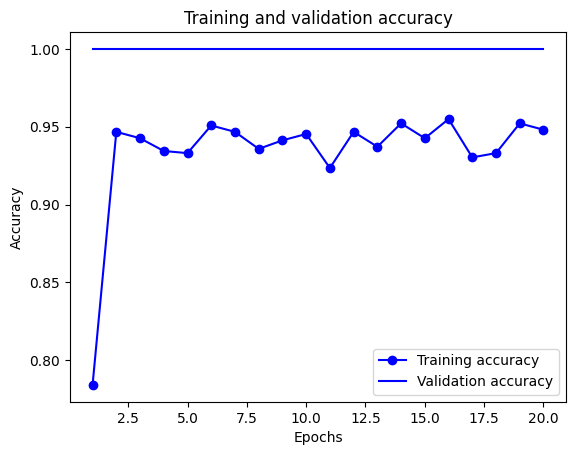

In [8]:
# Plot the training and validation accuracy as a line
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model Testing on unseen data

In [9]:
# Classes of Apples in quadrants 
train_data.class_indices


{'bottom-left': 0, 'bottom-right': 1, 'top-left': 2, 'top-right': 3}

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/content/drive/MyDrive/cusat-dcs-files/sem-2/deeplearning-cv/assignment/Aneetta_DeepCV_Assignment_05_Apple_CNN_Classifier/custom-generated-apple-dataset/unseen-data.png'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0
# Use the model to make a prediction
preds = model.predict(x)
print(preds.argmax(axis=-1))

1/1 [==============================] - 1s 636ms/step
[2]


**Submitted By**

---
Aneetta Sara Shany - *MTech CSE Software Engineering*

**Guide**

---
Dr. Shailesh Sivan